# 29. 누적 막대 그래프

In [3]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size']=15
plt.rcParams['axes.unicode_minus']=False

In [3]:
import pandas as pd
df=pd.read_excel('../pandas/score.xlsx')
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,1번,채치수,북산고,197,90,85,100,95,85,Python
1,2번,정대만,북산고,184,40,35,50,55,25,Java
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript
3,4번,서태웅,북산고,187,40,60,70,75,80,NaN
4,5번,강백호,북산고,188,15,20,10,35,10,NaN
5,6번,변덕규,능남고,202,80,100,95,85,80,C
6,7번,황태산,능남고,188,55,65,45,40,35,PYTHON
7,8번,윤대협,능남고,190,100,85,90,95,95,C#


<BarContainer object of 8 artists>

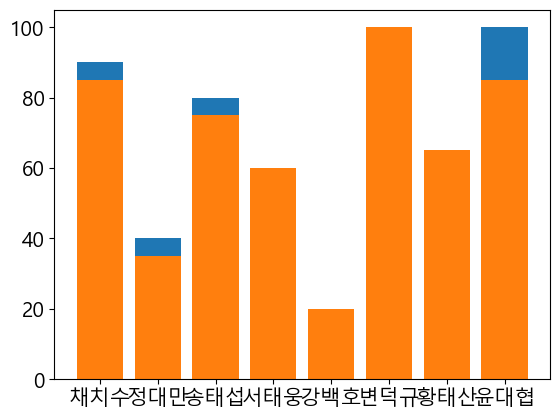

In [4]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'])

<BarContainer object of 8 artists>

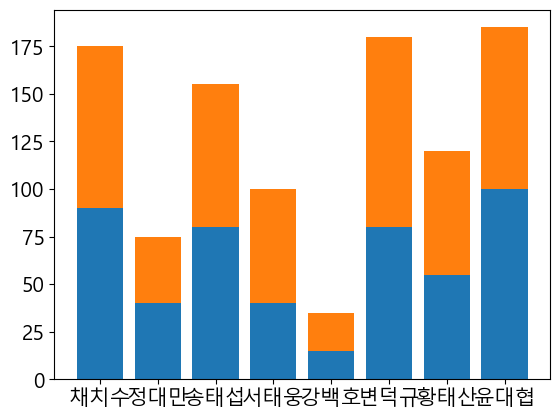

In [5]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'], bottom=df['국어'])

<BarContainer object of 8 artists>

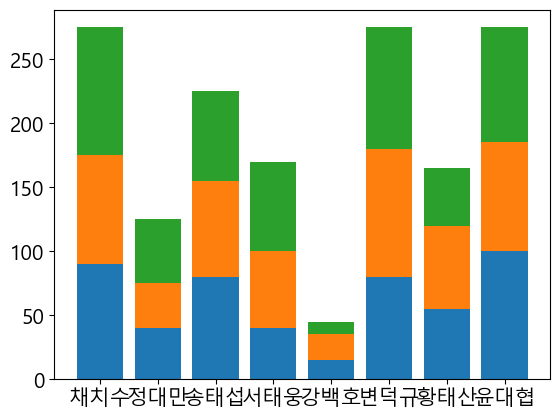

In [6]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'], bottom=df['국어'])
plt.bar(df['이름'], df['수학'], bottom=df['국어']+df['영어'])

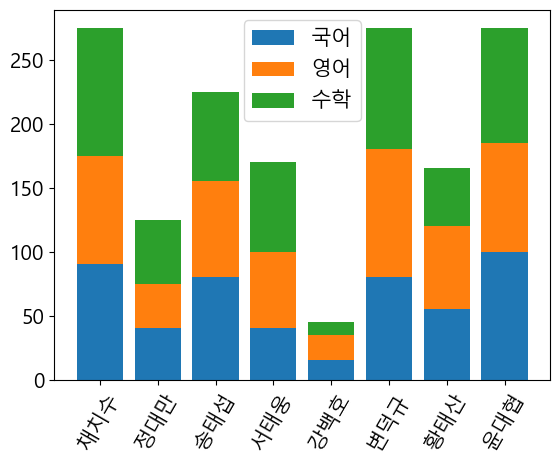

In [7]:
plt.bar(df['이름'], df['국어'], label='국어')
plt.bar(df['이름'], df['영어'], bottom=df['국어'], label='영어')
plt.bar(df['이름'], df['수학'], bottom=df['국어']+df['영어'], label='수학')

plt.xticks(rotation=60)
plt.legend()

# 30. 다중막대 그래프

In [8]:
import numpy as np

In [10]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [12]:
np.arange(3,6)

array([3, 4, 5])

In [13]:
arr= np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [14]:
arr+100

array([100, 101, 102, 103, 104])

In [15]:
arr*3

array([ 0,  3,  6,  9, 12])

In [17]:
df.shape[0]

8

In [18]:
N =df.shape[0]
N

8

In [19]:
index=np.arange(N)
index

array([0, 1, 2, 3, 4, 5, 6, 7])

<BarContainer object of 8 artists>

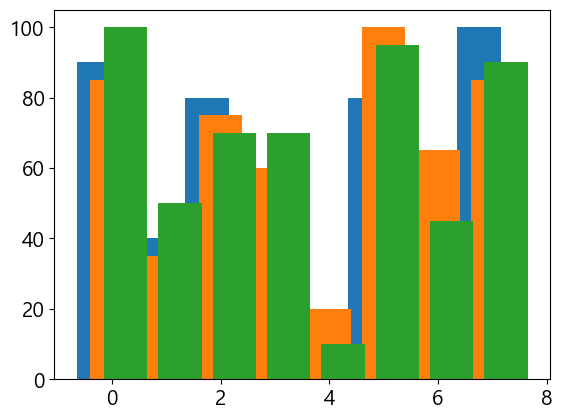

In [22]:
w=0.25  #위치
plt.bar(index-w, df['국어'])
plt.bar(index,df['영어'])
plt.bar(index+w, df['수학'])

<BarContainer object of 8 artists>

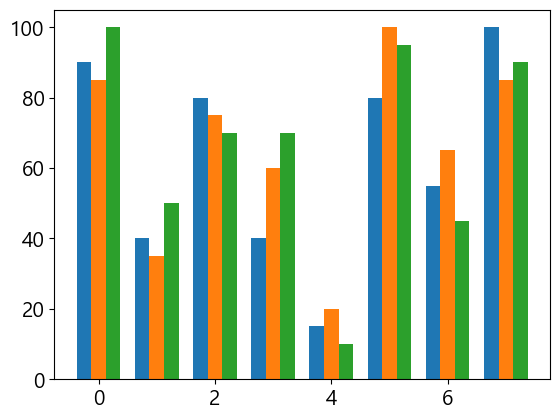

In [23]:
w=0.25  #위치
plt.bar(index-w, df['국어'], width=w)
plt.bar(index,df['영어'], width=w)
plt.bar(index+w, df['수학'],width=w)

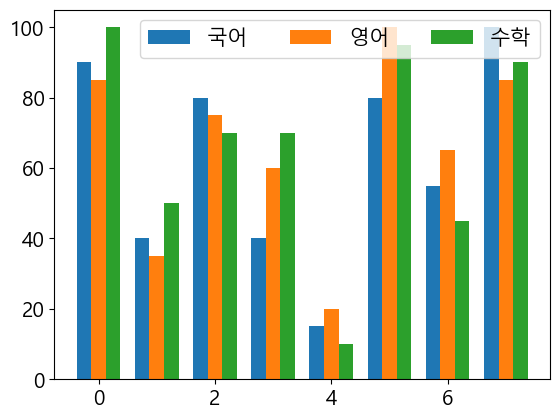

In [24]:
w=0.25  #위치
plt.bar(index-w, df['국어'], width=w, label='국어')
plt.bar(index,df['영어'], width=w, label='영어')
plt.bar(index+w, df['수학'],width=w, label='수학')

plt.legend(ncol=3)

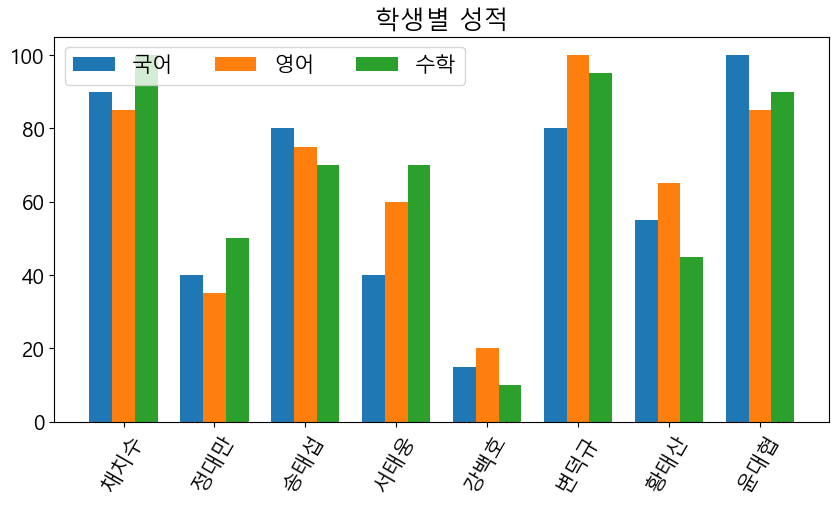

In [26]:
plt.figure(figsize=(10,5))
plt.title('학생별 성적')
w=0.25  #위치
plt.bar(index-w, df['국어'], width=w, label='국어')
plt.bar(index,df['영어'], width=w, label='영어')
plt.bar(index+w, df['수학'],width=w, label='수학')

plt.legend(ncol=3)
plt.xticks(index, df['이름'], rotation=60)
plt.show()

# 31. 원 그래프(기본)

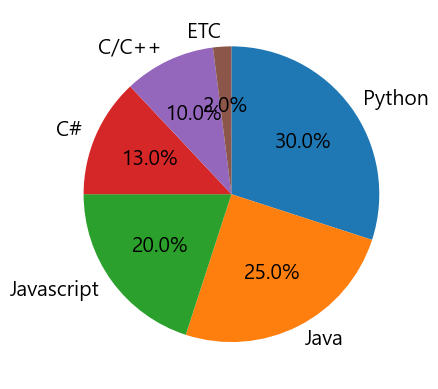

In [9]:
values=[30,25,20,13,10,2]
labels=['Python', 'Java', 'Javascript', 'C#', 'C/C++', 'ETC']

plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()

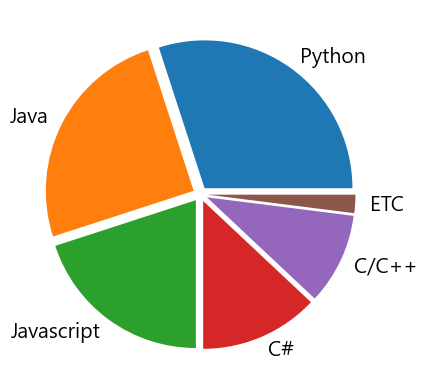

In [11]:
values=[30,25,20,13,10,2]
labels=['Python', 'Java', 'Javascript', 'C#', 'C/C++', 'ETC']
explode=[0.05]*6

plt.pie(values, labels=labels, explode=explode)
plt.show()

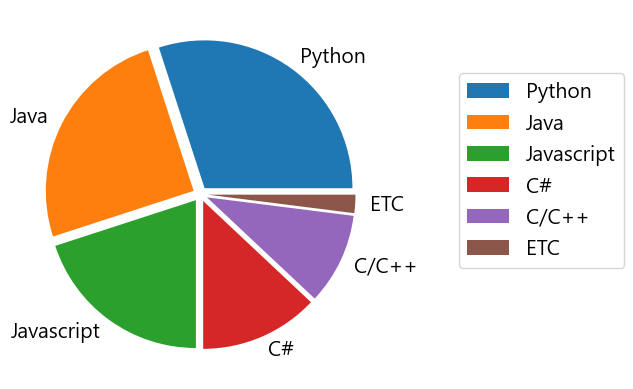

In [12]:
plt.pie(values, labels=labels, explode=explode)
plt.legend(loc=(1.2,0.3))
plt.show()

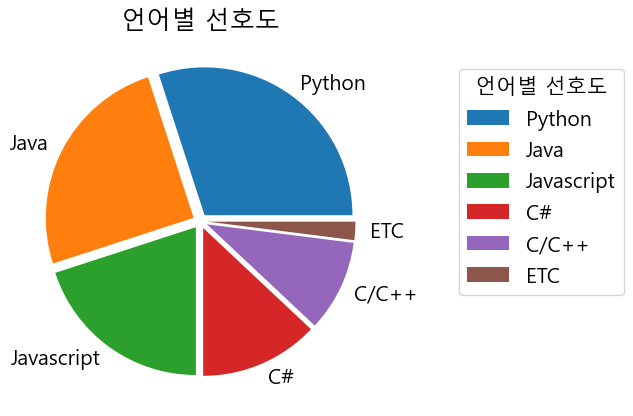

In [14]:
plt.pie(values, labels=labels, explode=explode)
plt.title('언어별 선호도')
plt.legend(loc=(1.2,0.3), title='언어별 선호도')
plt.show()

# 32. 원 그래프 (심화)

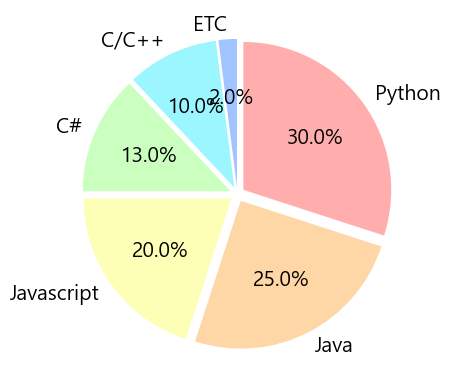

In [21]:
values=[30,25,20,13,10,2]
labels=['Python', 'Java', 'Javascript', 'C#', 'C/C++', 'ETC']
#colors=['b','g','r','c','m','y']
colors=['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff']
explode=[0.05]*6

plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors,explode=explode)
plt.show()

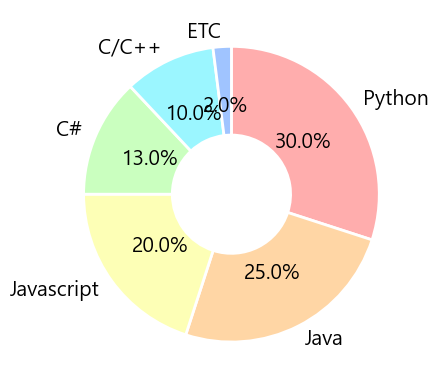

In [25]:
wedgeprops={'width':0.6, 'edgecolor':'w', 'linewidth':2}
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, colors=colors,wedgeprops=wedgeprops)
plt.show()

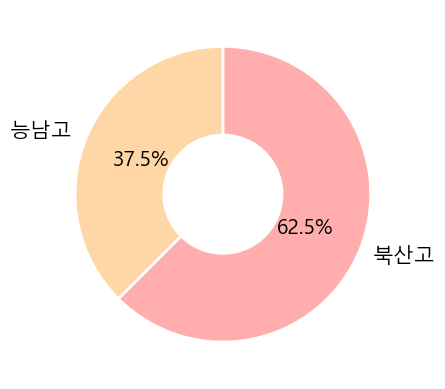

In [87]:
def custom_autopct(pct):
    #return ('%.1f%%' % pct) if pct >= 10 else ' '
    return '{:.1f}%'.format(pct) if pct >= 10 else ' '
    
    #return '{:.0f}%'.format(pct) if pct >= 10 else ' '

plt.pie(values, labels=labels, autopct=custom_autopct, startangle=90, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

## DataFrame 활용

In [41]:
import pandas as pd
df=pd.read_excel('../pandas/score.xlsx')
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,1번,채치수,북산고,197,90,85,100,95,85,Python
1,2번,정대만,북산고,184,40,35,50,55,25,Java
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript
3,4번,서태웅,북산고,187,40,60,70,75,80,NaN
4,5번,강백호,북산고,188,15,20,10,35,10,NaN
5,6번,변덕규,능남고,202,80,100,95,85,80,C
6,7번,황태산,능남고,188,55,65,45,40,35,PYTHON
7,8번,윤대협,능남고,190,100,85,90,95,95,C#


In [42]:
grp=df.groupby('학교')
grp

In [43]:
grp.size()['북산고']

5

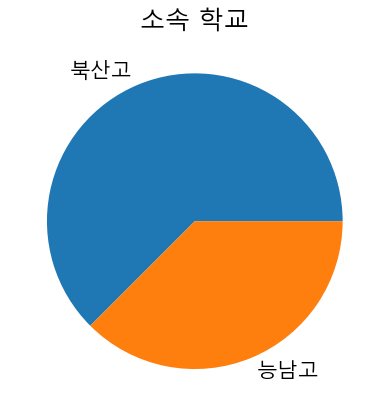

In [44]:
values=[grp.size()['북산고'], grp.size()['능남고']]
labels=['북산고', '능남고']

plt.pie(values, labels=labels)
plt.title('소속 학교')
plt.show()

# 33. 산점도 그래프

In [45]:
df['학년']=[3,3,2,1,1,3,2,2]
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,학년
0,1번,채치수,북산고,197,90,85,100,95,85,Python,3
1,2번,정대만,북산고,184,40,35,50,55,25,Java,3
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,2
3,4번,서태웅,북산고,187,40,60,70,75,80,NaN,1
4,5번,강백호,북산고,188,15,20,10,35,10,NaN,1
5,6번,변덕규,능남고,202,80,100,95,85,80,C,3
6,7번,황태산,능남고,188,55,65,45,40,35,PYTHON,2
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,2


Text(0, 0.5, '수학 점수')

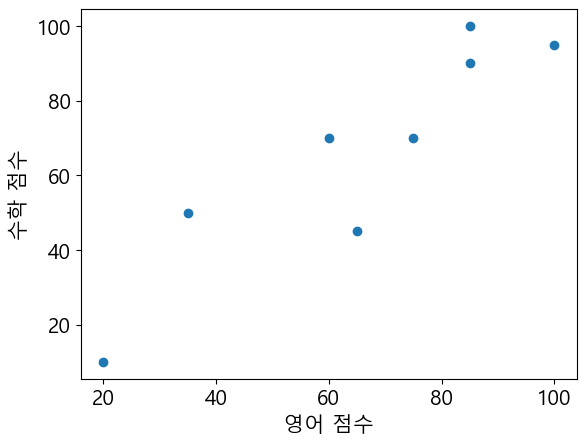

In [46]:
plt.scatter(df['영어'], df['수학'])
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')

In [48]:
import numpy as np
sizes=np.random.rand(8)*100
sizes

array([ 1.14256918, 78.78799718, 36.42014859, 19.60506076, 34.11232349,
       19.06057698, 74.40095692, 98.80539222])

Text(0, 0.5, '수학 점수')

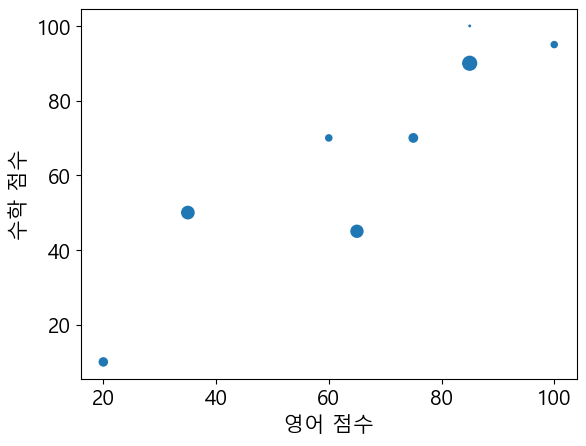

In [49]:
plt.scatter(df['영어'],df['수학'],s=sizes)
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')

Text(0, 0.5, '수학 점수')

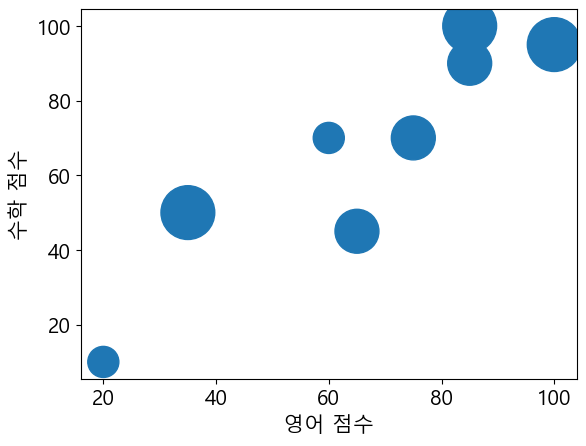

In [51]:
sizes=df['학년']* 500
plt.scatter(df['영어'],df['수학'],s=sizes)
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')

Text(0, 0.5, '수학 점수')

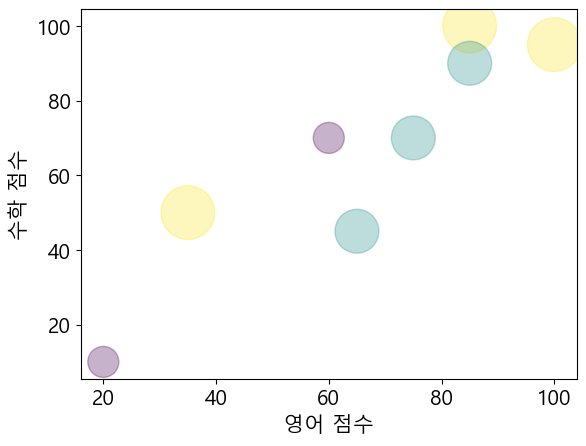

In [53]:
plt.scatter(df['영어'],df['수학'],s=sizes, c=df['학년'], cmap='viridis', alpha=0.3)
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')

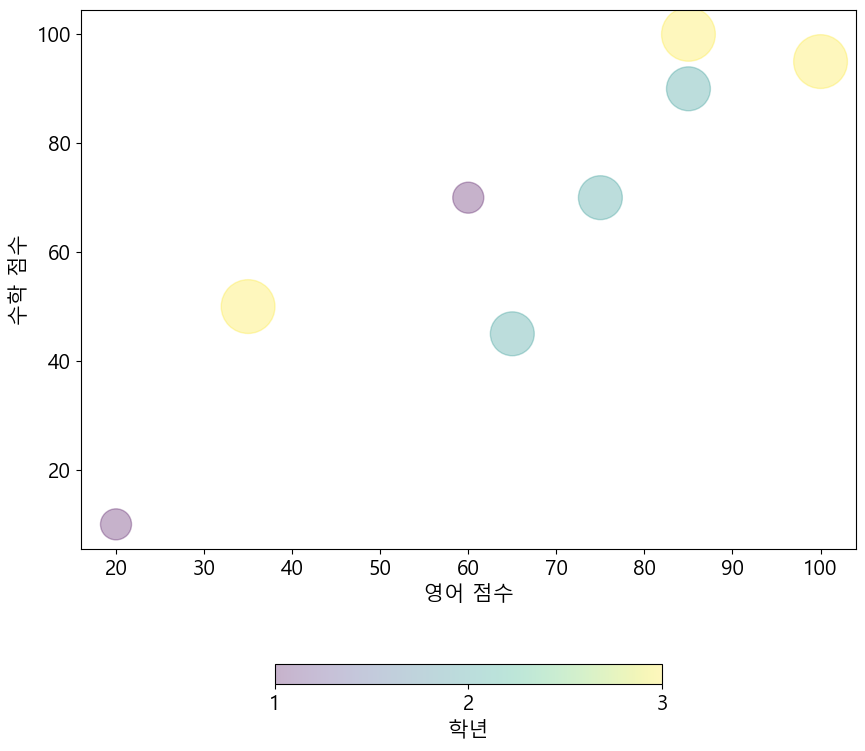

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(df['영어'],df['수학'],s=sizes, c=df['학년'], cmap='viridis', alpha=0.3)
plt.xlabel('영어 점수')
plt.ylabel('수학 점수')
plt.colorbar(ticks=[1,2,3], label='학년', shrink=0.5, orientation='horizontal')

# 34. 여러 그래프 

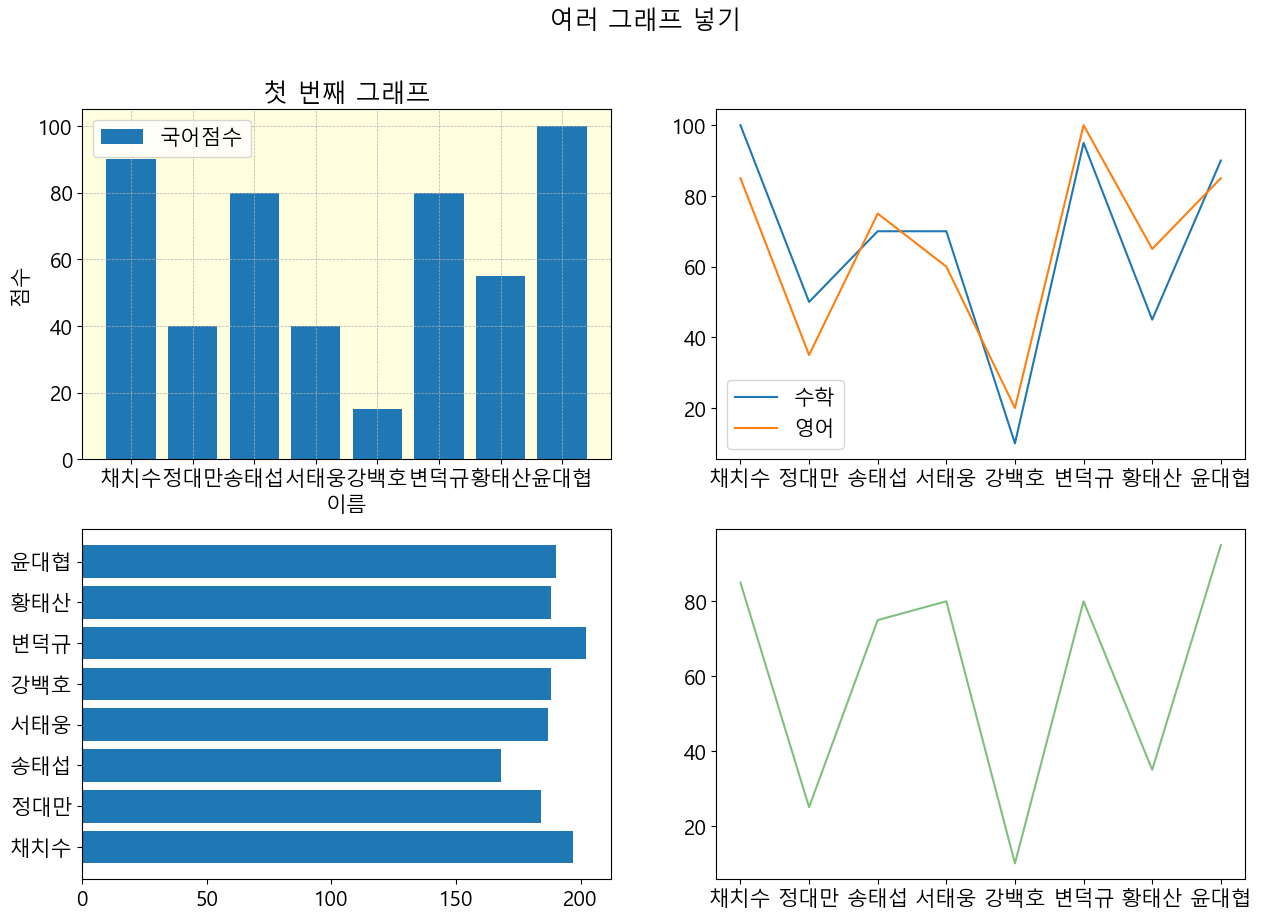

In [66]:
fig, axe=plt.subplots(2,2, figsize=(15,10)) 
fig.suptitle('여러 그래프 넣기')

axe[0, 0].bar(df['이름'], df['국어'], label='국어점수') #데이터 설정
axe[0, 0].set_title('첫 번째 그래프') #제목
axe[0, 0].legend()
axe[0, 0].set(xlabel='이름', ylabel='점수') 
axe[0, 0].set_facecolor('lightyellow') #전면 색
axe[0, 0].grid(linestyle='--', linewidth=0.5)

axe[0, 1].plot(df['이름'], df['수학'], label='수학')
axe[0, 1].plot(df['이름'], df['영어'], label='영어')
axe[0, 1].legend()

axe[1, 0].barh(df['이름'], df['키'])

axe[1, 1].plot(df['이름'], df['사회'], color='green', alpha=0.5)

# 35. Matplotlib 퀴즈

다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개의 데이터입니다.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1) 영화 데이터를 활용하여 x축은 영화, y축은 평점인 막대 그래프를 만드시오.

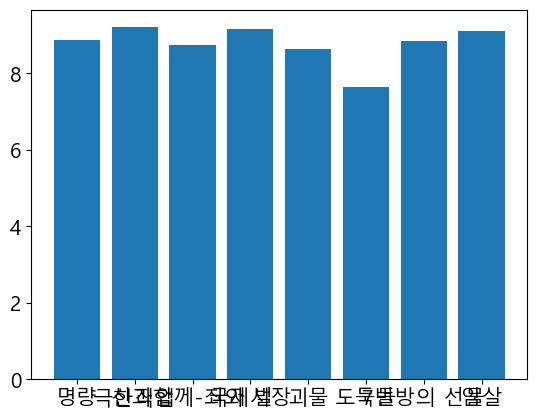

In [70]:
plt.bar(df['영화'], df['평점'])
plt.show()

## 2) 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오.
  -  제목: 국내 Top 8 영화 평점 정보
  - x축 label : 영화 (90도 회전)
  - y축 label : 평점

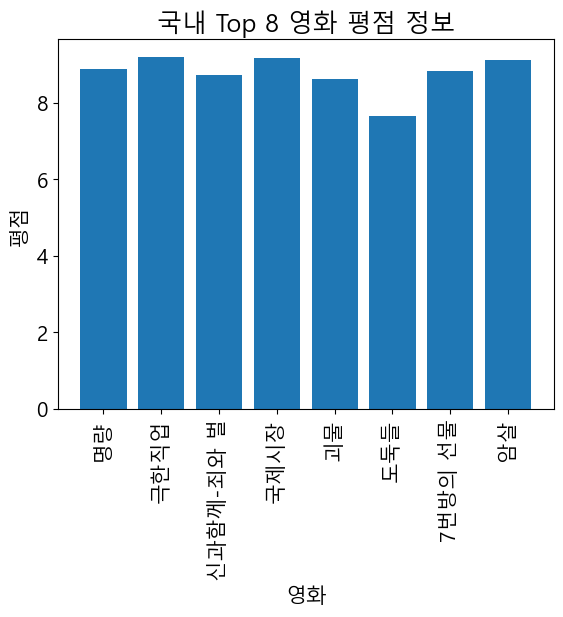

In [77]:
plt.bar(df['영화'], df['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(df['영화'], rotation=90)
plt.show()

## 3) 개봉 연도별 평점 변화 추이를 꺾은 선 그래프로 그리시오.

연도별 평균 데이터를 구하는 코드는 다음과 같습니다.

In [79]:
df_group=df.groupby('개봉 연도').mean()
df_group

C:\Users\user\AppData\Local\Temp\ipykernel_32416\2422056071.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group=df.groupby('개봉 연도').mean()


,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


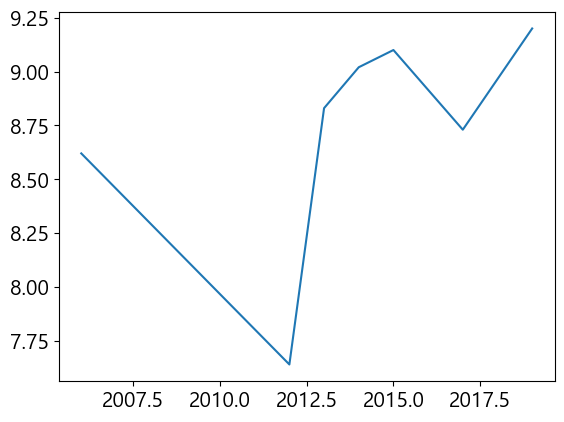

In [88]:
plt.plot(df_group.index, df_group['평점'])

## 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오.
  - marker : 'o'
  - x축 눈금: 최소 5년 단위 (2005~2020)
  - y축 범위: 최소 7, 최대 10

(7.0, 10.0)

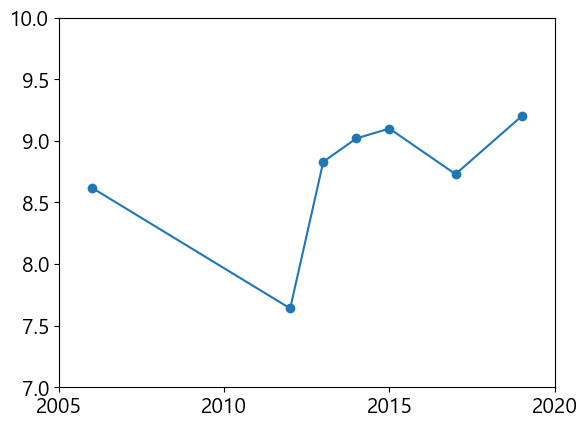

In [89]:
plt.plot(df_group.index, df_group['평점'], marker='o')
plt.xticks([2005,2010,2015,2020])
plt.ylim(7,10)

## 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프를 제시된 세부 사항을 적용하여 그리시오.
  - label: 9점 이상/ 9점 미만
  - 퍼센트: 소수점 첫째자리까지 표시
  - 범례: 그래프 우측에 표시

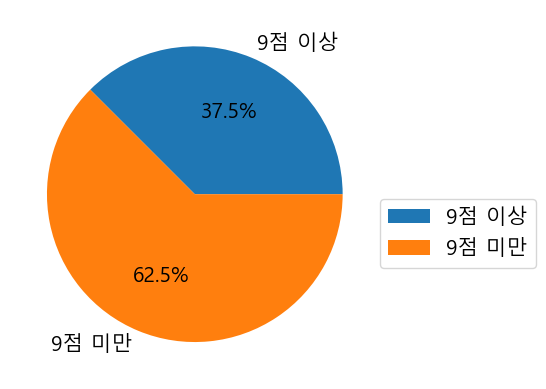

In [90]:
filt=df['평점']>=9.0
values= [len(df[filt]), len(df[~filt])]
labels=['9점 이상', '9점 미만']

plt.pie(values, labels=labels, autopct='%.1f%%')


plt.legend(loc=(1,0.3))
plt.show()